# Mapping the Universe through data

### Kevin Darmawan 1806148744
### Probstok - 4
In this project, we will be making a predictive model using data collected through the Sloan Digital Sky Survey (SDSS) to classify: Galaxies, Stars, Quasars, through the unique properties using random tree classifier method. Also, we will also build an analysis of space objects properties based on the data and create a 3D model of space objects in the dataset, to get a better visualzation of what the spread of the universe looks like.

Project ini akan mencakup pembuatan model prediksi yang dapat mengklasifikasikan objek langit yang tertangkap dalam dataset Sloan Digital Sky Survey (SDSS) berdasarkan ciri" unik benda langit (Bintang, Galaksi, Quasar) menggunakan metode random tree classifier. Selain itu, juga membuat analisis perbedaan objek langit dari ciri" nya, serta membuat model 3D dari objek langit yang terdapat pada dataset, untuk mendapatkan visualisasi persebaran benda langit alam semesta.

Below are the imagery and dataset being used

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

df = pd.read_csv("Skyserver_SQL12_1_2019 1_53_51 PM.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,4.300000e+17,0.032125,382,51816,368,GALAXY
1,1.240000e+18,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,512,4.660000e+17,0.121315,414,51869,410,GALAXY
2,1.240000e+18,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,512,4.660000e+17,0.048765,414,51869,401,GALAXY
3,1.240000e+18,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,100,1.710000e+18,-0.000098,1515,52932,208,STAR
4,1.240000e+18,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,37,4.590000e+17,0.040287,408,51821,100,GALAXY


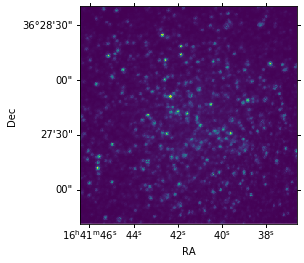

In [22]:
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

hdu = SkyView.get_images("M13", survey='SDSSg')[0][0]

wcs = WCS(hdu.header)
ax = plt.gca(projection=wcs)

ax.imshow(hdu.data)
ax.set(xlabel="RA", ylabel="Dec")
plt.show()

In [55]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.00000,10000.00000,10000.000000
mean,1.240000e+18,168.186658,17.493231,18.611683,17.359519,16.830308,16.574315,16.417583,1056.095400,301.0,3.852200,313.46420,1.703824e+18,0.150653,1513.21460,52990.61000,370.798800
std,2.122346e+05,36.635902,25.577955,0.830728,0.963646,1.082117,1.155691,1.228044,352.154697,0.0,1.554927,155.33648,1.977062e+18,0.402632,1756.15318,1481.97836,201.823736
min,1.240000e+18,27.567750,-1.049340,13.422110,12.357220,11.629170,11.186280,10.874560,94.000000,301.0,1.000000,11.00000,3.000000e+17,-0.003328,266.00000,51578.00000,1.000000
25%,1.240000e+18,145.589920,0.149520,18.170187,16.808633,16.175520,15.853822,15.615785,756.000000,301.0,2.000000,208.00000,3.420000e+17,0.000104,304.00000,51909.00000,207.000000
50%,1.240000e+18,169.342318,1.152341,18.841825,17.487580,16.842955,16.549420,16.376240,1239.000000,301.0,4.000000,314.00000,5.750000e+17,0.040901,511.00000,52024.00000,382.000000
75%,1.240000e+18,189.691087,47.817662,19.253140,18.003825,17.512970,17.257755,17.132105,1350.000000,301.0,5.000000,424.00000,2.880000e+18,0.093834,2559.00000,54468.00000,524.000000
max,1.240000e+18,348.902530,68.542265,19.599940,19.923930,24.802030,28.179630,28.234510,1462.000000,301.0,6.000000,784.00000,9.470000e+18,4.192597,8410.00000,57481.00000,1000.000000


In [56]:
# data rapi dan tidak perlu cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
class        10000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
df.nunique().to_frame().transpose()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1,10000,10000,9745,9826,9849,9864,9887,20,1,6,698,6295,3,9650,499,368,876


### Creating the classifier

X Values are the Features of space objects
; Y Values are the class of the space objects

X merupakan ciri-ciri objek langit
; Y merupakan jenis dari benda langit

In [5]:
X = df.drop('class', axis=1)
y = df['class']

In [6]:
# Menguji isi dari parameter X, ciri" objek langit
X[:5]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,4.300000e+17,0.032125,382,51816,368
1,1.240000e+18,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,512,4.660000e+17,0.121315,414,51869,410
2,1.240000e+18,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,512,4.660000e+17,0.048765,414,51869,401
3,1.240000e+18,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,100,1.710000e+18,-0.000098,1515,52932,208
4,1.240000e+18,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,37,4.590000e+17,0.040287,408,51821,100


In [7]:
# Membuat training model dari 0,3 kali jumlah data dari dataset = 3000 data training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)
clf = RandomForestClassifier()

In [8]:
# parameter yang akan di tuning 
# n_estimators (Jml pohon dalam 'forest')
# max_features (jumlah maks ciri yang dipakai dalam pembuatan keputusan)
# max_depth (orde maksimal dari decision tree)
# min_samples_split (jumlah point data terkecil ketika percabangan)
# min_samples_leaf (jumlah point data minimal dalam node)
# criterion (parameter final klasifikasi pohon keputusan)

from pprint import pprint
pprint(clf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [9]:
# model ini akan menggunakan beberapa parameter yang akan diatur untuk meningkatkan akurasi menggunakan dataset ini
# parameter ini merupakan hyperparameter

hyperparameters = {'max_features':[None, 'auto', 'sqrt', 'log2'],
                   'max_depth':[None, 1, 5, 10, 15, 20],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                   'criterion': ['gini', 'entropy']}

# Randomized Search Cross Validation digunakan untuk meng-cross check nilai" hyperparameter secara random
# parameter yang di random dicoba untuk di fit terhadap variabel training
# n_iter = banyaknya kombinasi
# cv = kelipatan cross check
rf_random = RandomizedSearchCV(clf, hyperparameters, n_iter = 100, cv = 10, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.7min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_features': [None, 'auto', 'sqrt', 'log2'], 'max_depth': [None, 1, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [11]:
# parameter terbaik setelah pengujian CV dan di fit
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy'}

In [12]:
clf = RandomForestClassifier(n_estimators = 80,
                             min_samples_split = 2,
                             min_samples_leaf = 1,
                             max_features = None,
                             max_depth = None,
                             criterion = 'entropy')

In [13]:
# fitting variabel training kedalam random tree classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
y_preds = clf.predict(X_test)

In [15]:
# baris pertama : mengetes prediksi klasifikasi 10 data teratas
# baris kedua : 10 data teratas yang sebenarnya
# didapatkan 100% kecocokan untuk 10 data tersebut

print(y_preds[:10],'\n',y_test[:10])

['GALAXY' 'STAR' 'STAR' 'GALAXY' 'GALAXY' 'STAR' 'STAR' 'GALAXY' 'STAR'
 'STAR'] 
 7054    GALAXY
4692      STAR
907       STAR
4498    GALAXY
9957    GALAXY
3341      STAR
7152      STAR
1152    GALAXY
7105      STAR
2066      STAR
Name: class, dtype: object


In [16]:
print('accuracy_score by Decision Tree Classifier:',accuracy_score(y_true=y_test, y_pred=y_preds))

accuracy_score by Decision Tree Classifier: 0.9893333333333333


In [17]:
sortedlabels = clf.classes_
accscore = accuracy_score(y_test, y_preds)
f1score = f1_score(y_test, y_preds, average = None)
print(accscore)
for i in range(3):
    print((sortedlabels[i],f1score[i]), end=" ")

0.9893333333333333
('GALAXY', 0.989326217478319) ('QSO', 0.9456740442655936) ('STAR', 0.998003992015968) 

In [18]:
cm = confusion_matrix(y_test, y_preds, y)
print(classification_report(y_test, y_preds))
print(cm)

#skor akurasi prediksi dan jumlah dari Galaksi, Quasar, dan bintang yang berhasil diprediksi

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1495
         QSO       0.96      0.93      0.95       253
        STAR       1.00      1.00      1.00      1252

   micro avg       0.99      0.99      0.99      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0 1250    2]
 [   0    0    0 ...    0    3 1483]]


In [ ]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [43]:
from collections import Counter
prediction = clf.predict(X)
Counter(prediction)

Counter({'GALAXY': 5000, 'STAR': 4119, 'QSO': 881})

Text(0.5, 1.0, 'Space Objs predictive classification')

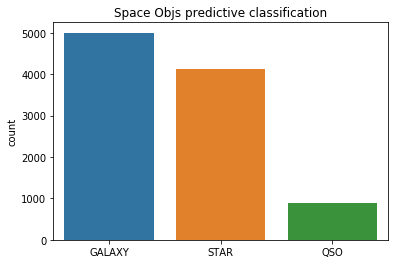

In [44]:
sns.countplot(x = prediction).set_title('Space Objs predictive classification')

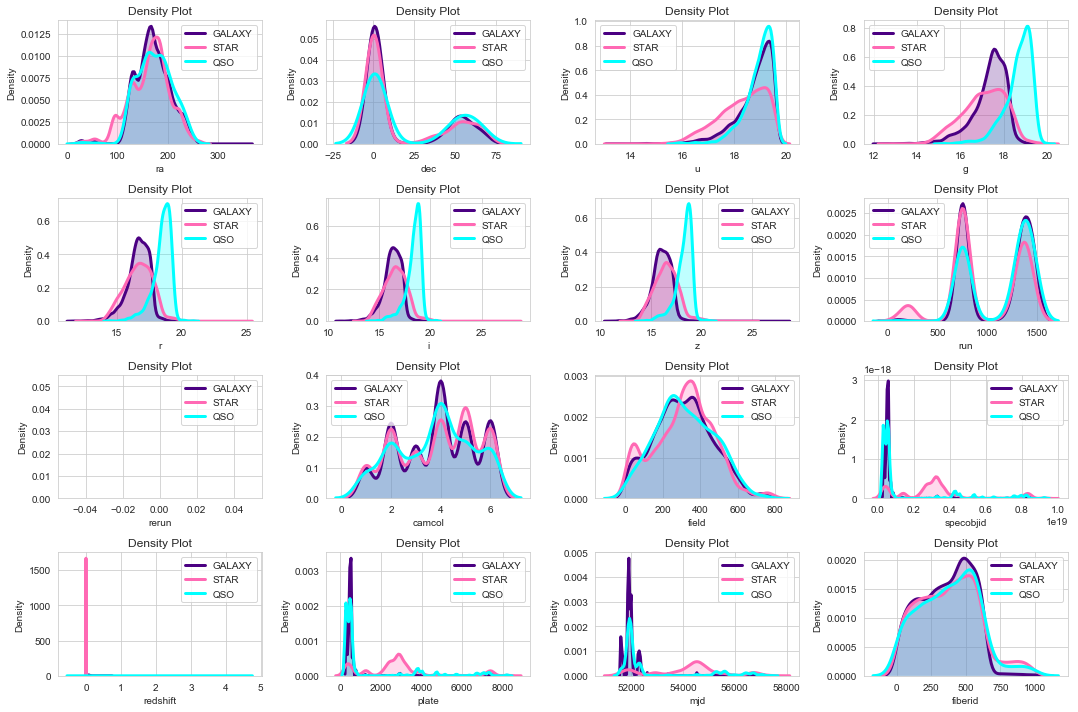

In [18]:
featuredf = df.drop(['class','objid'], axis=1)
featurecols = list(featuredf)
astrObjs = df['class'].unique()
colours = ['indigo', '#FF69B4', 'cyan']
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(4, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(df[df['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, color = colours[j], kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(featurecols[i])
    plt.ylabel('Density')
plt.tight_layout()

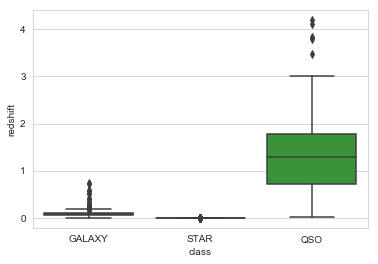

In [2]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'class', y = 'redshift', data = df) 

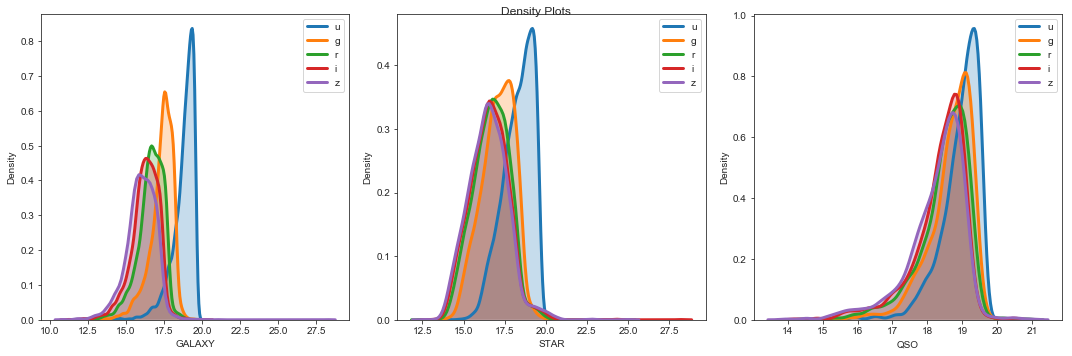

In [44]:
featured = df[['u','g','r','i','z']]
featurecols2 = list(featured)
filterbands = pd.concat([df.iloc[:,3:8], df['class']],axis=1)
plt.figure(figsize=(15,5))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for i in range(len(astrObjs)):
    plt.subplot(1, 3, i+1)
    for j in range(len(featurecols2)):
        sns.distplot(df[df['class']==astrObjs[i]][featurecols2[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = featurecols2[j])
    plt.legend()
    plt.xlabel(astrObjs[i])
    plt.ylabel('Density')
plt.tight_layout()

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

dfgal = df.loc[(df["class"]) == 'GALAXY']
dfstar = df.loc[(df["class"]) == 'STAR']
dfqso = df.loc[(df["class"]) == 'QSO']

radec = SkyCoord(ra=dfgal['ra']*u.degree, dec=dfgal['dec']*u.degree, frame='icrs')
radec2 = SkyCoord(ra=dfstar['ra']*u.degree, dec=dfstar['dec']*u.degree, frame='icrs')
radec3 = SkyCoord(ra=dfqso['ra']*u.degree, dec=dfqso['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic
galactic2 = radec2.galactic
galactic3 = radec3.galactic

dfgal['l'] = galactic.l.value
dfgal['b'] = galactic.b.value

dfstar['l'] = galactic2.l.value
dfstar['b'] = galactic2.b.value

dfqso['l'] = galactic3.l.value
dfqso['b'] = galactic3.b.value


r = cosmo.comoving_distance(dfgal['redshift'])
dfgal['distance']= r.value

r2 = cosmo.comoving_distance(dfstar['redshift'])
dfstar['distance']= r2.value

r3 = cosmo.comoving_distance(dfqso['redshift'])
dfqso['distance']= r3.value

In [ ]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(dfgal['distance'],dfgal['ra'],dfgal['dec'])
dfgal['x_coord'] = cart[0]
dfgal['y_coord'] = cart[1]
dfgal['z_coord'] = cart[2]

cart2 = cartesian(dfstar['distance'],dfstar['ra'],dfstar['dec'])
dfstar['x_coord'] = cart2[0]
dfstar['y_coord'] = cart2[1]
dfstar['z_coord'] = cart2[2]

cart3 = cartesian(dfqso['distance'],dfqso['ra'],dfqso['dec'])
dfqso['x_coord'] = cart3[0]
dfqso['y_coord'] = cart3[1]
dfqso['z_coord'] = cart3[2]

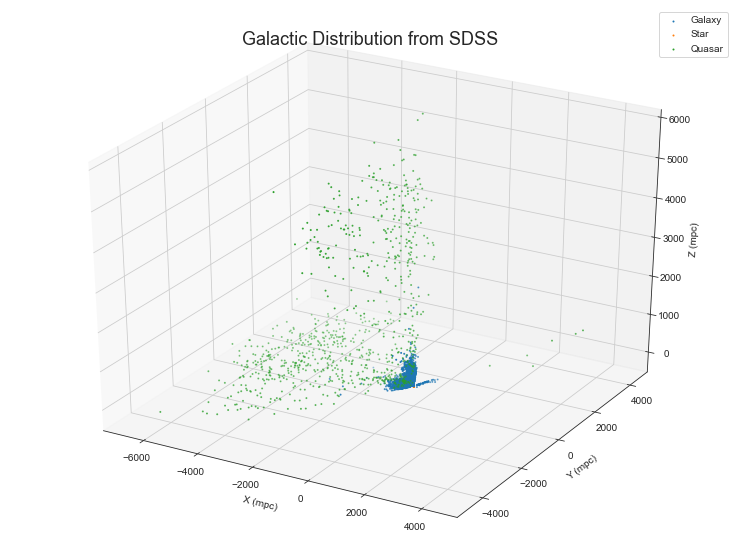

In [75]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(dfgal['x_coord'],dfgal['y_coord'],dfgal['z_coord'], s = 1.0, label='Galaxy')
ax.scatter(dfstar['x_coord'],dfstar['y_coord'],dfstar['z_coord'], s = 1.0, label='Star')
ax.scatter(dfqso['x_coord'],dfqso['y_coord'],dfqso['z_coord'], s = 1.0, label='Quasar')

ax.set_xlabel('X (mpc)')
ax.set_ylabel('Y (mpc)')
ax.set_zlabel('Z (mpc)')
ax.set_title('Galactic Distribution from SDSS',fontsize=18)
ax.legend()
plt.show()

## Color wavelength table

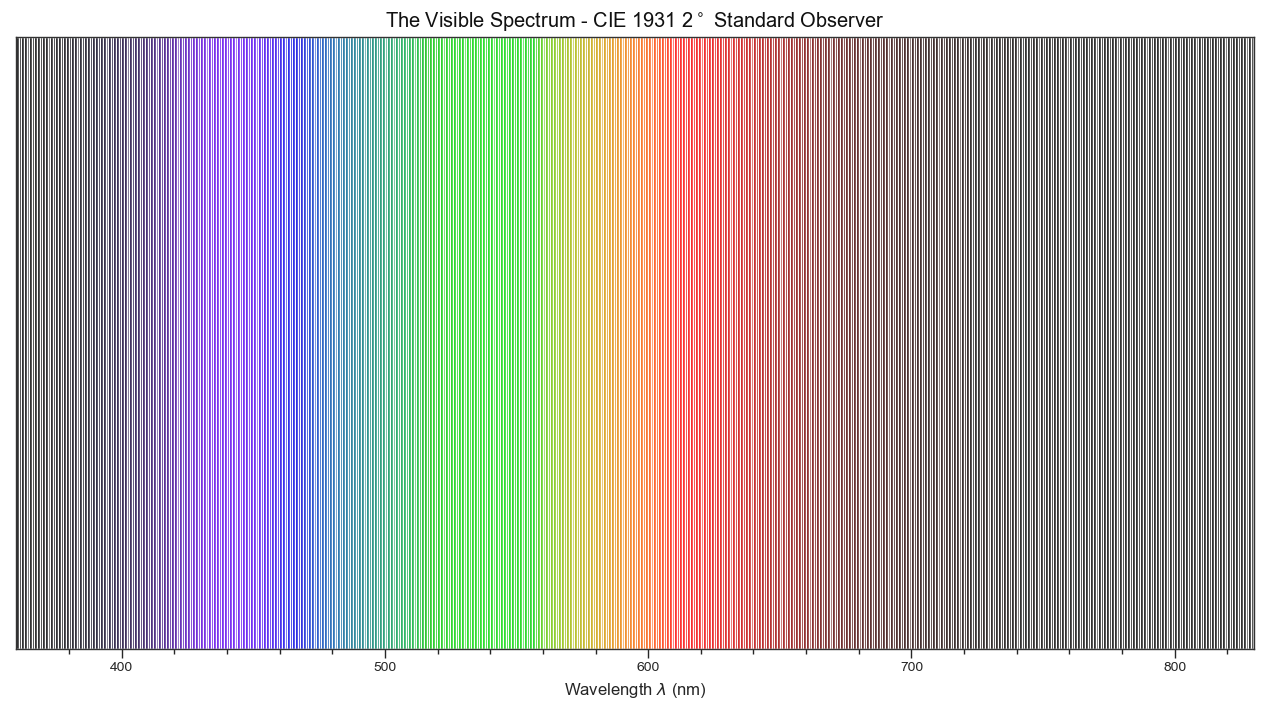

(<Figure size 1280x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26357dd0048>)

In [54]:
import colour
from colour.plotting import *
colour_style()
plot_visible_spectrum()